In [1]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd



tf.__version__
from PIL import Image
import glob
import cv2
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.models import Sequential, Model 
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Input
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Lambda, Input, AveragePooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.metrics import categorical_accuracy
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.layers import BatchNormalization

from sklearn.model_selection import train_test_split


C:\Users\Akshay\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Akshay\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Akshay\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Akshay\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

In [2]:
raw_train = pd.read_csv(r"C:\Users\Akshay\Desktop\Semester 3\Deep Learning\Assignment\Assignment 1\Data\train_data.csv")
raw_train['filename']="Data\modified_data\\"+raw_train['filename']

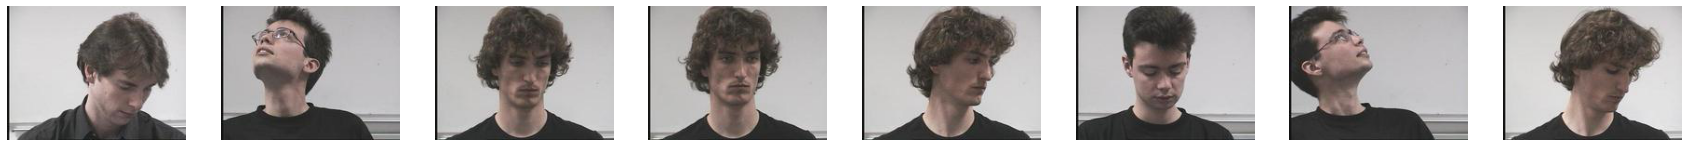

In [3]:
r_inx = np.random.choice(1000, 8)
rand_data = raw_train.loc[r_inx,'filename']

plt.figure(figsize=(30,4))
for i, image_path in enumerate(rand_data):
    im = np.asarray(Image.open(image_path))
    plt.subplot(1,8,i+1)
    plt.imshow(im,cmap='gray')
    plt.axis('off')
    
plt.show()

In [4]:
img=cv2.imread(r"C:\Users\Akshay\Desktop\Semester 3\Deep Learning\Assignment\Assignment 1\Data\modified_data\face_1.jpg",1)
resized_img=cv2.resize(img,(int(64),int(64)))
cv2.imshow("face1",resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [5]:
resized_img.shape

(64, 64, 3)

In [6]:
raw_train['filename']="C:\\Users\Akshay\Desktop\Semester 3\Deep Learning\Assignment\Assignment 1\\" +raw_train['filename']

In [7]:
raw_train.head()

,filename,person_id,series,tilt,pan
0,C:\Users\Akshay\Desktop\Semester 3\Deep Learni...,5,1,-15,30
1,C:\Users\Akshay\Desktop\Semester 3\Deep Learni...,5,1,0,-75
2,C:\Users\Akshay\Desktop\Semester 3\Deep Learni...,5,2,-15,-60
3,C:\Users\Akshay\Desktop\Semester 3\Deep Learni...,5,2,0,-90
4,C:\Users\Akshay\Desktop\Semester 3\Deep Learni...,5,2,15,-75


In [8]:
mean_list = []
min_list = []
max_list = []
std_list = []
pic_name = []
for i in raw_train['filename']:
    pic=cv2.imread(i)
    pic_name.append(i)
    mean_list.append(pic.mean())
    min_list.append(pic.min())
    max_list.append(pic.max())
    std_list.append(pic.std())
    

In [9]:
# dictionary of lists  
dict = {'name': pic_name, 'image_pixel_mean': mean_list, 'image_pixel_min': min_list , 'image_pixel_max':max_list,'image_pixel_std':std_list }  
    
df = pd.DataFrame(dict) 
    
df  

,name,image_pixel_mean,image_pixel_min,image_pixel_max,image_pixel_std
0,C:\Users\Akshay\Desktop\Semester 3\Deep Learni...,136.058473,0,234,62.664363
1,C:\Users\Akshay\Desktop\Semester 3\Deep Learni...,131.414255,0,237,62.282919
2,C:\Users\Akshay\Desktop\Semester 3\Deep Learni...,133.570047,1,232,61.976778
3,C:\Users\Akshay\Desktop\Semester 3\Deep Learni...,131.723356,1,241,64.748262
4,C:\Users\Akshay\Desktop\Semester 3\Deep Learni...,132.039738,0,240,62.257388
...,...,...,...,...,...
2320,C:\Users\Akshay\Desktop\Semester 3\Deep Learni...,134.030756,9,255,54.953588
2321,C:\Users\Akshay\Desktop\Semester 3\Deep Learni...,147.316647,1,255,61.263530
2322,C:\Users\Akshay\Desktop\Semester 3\Deep Learni...,135.614595,10,255,46.558939
2323,C:\Users\Akshay\Desktop\Semester 3\Deep Learni...,157.506064,2,255,60.549278


In [10]:
df.describe()

,image_pixel_mean,image_pixel_min,image_pixel_max,image_pixel_std
count,2325.000000,2325.000000,2325.000000,2325.000000
mean,144.696778,3.764301,244.384516,56.060394
std,8.971742,3.558029,11.969451,9.014530
min,130.661591,0.000000,208.000000,32.557892
25%,137.511972,0.000000,235.000000,49.593011
50%,142.600863,3.000000,249.000000,56.501381
75%,150.537652,6.000000,255.000000,61.905880
max,174.768904,12.000000,255.000000,86.604968


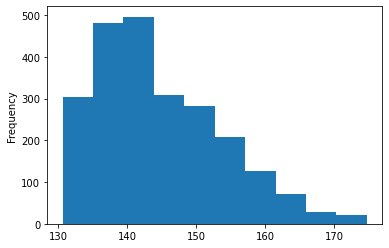

In [11]:
df['image_pixel_mean'].plot(kind='hist')

In [12]:
pd.crosstab(raw_train['tilt'],raw_train['pan'])

pan,-90,-75,-60,-45,-30,-15,0,15,30,45,60,75,90
tilt,,,,,,,,,,,,,
-90,0,0,0,0,0,0,25,0,0,0,0,0,0
-60,25,25,25,25,25,25,25,25,25,25,25,25,25
-30,25,25,25,25,25,25,25,25,25,25,25,25,25
-15,25,25,25,25,25,25,25,25,25,25,25,25,25
0,25,25,25,25,25,25,25,25,25,25,25,25,25
15,25,25,25,25,25,25,25,25,25,25,25,25,25
30,25,25,25,25,25,25,25,25,25,25,25,25,25
60,25,25,25,25,25,25,25,25,25,25,25,25,25
90,0,0,0,0,0,0,25,0,0,0,0,0,0


Considering this as a classification task:

In [13]:

raw_train.loc[raw_train['tilt']==-90,'tilt']='a-90'
raw_train.loc[raw_train['tilt']==-60,'tilt']='b-60'
raw_train.loc[raw_train['tilt']==-30,'tilt']='c-30'
raw_train.loc[raw_train['tilt']==-15,'tilt']='d-15'
raw_train.loc[raw_train['tilt']==0,'tilt']='e0'
raw_train.loc[raw_train['tilt']==15,'tilt']='f15'
raw_train.loc[raw_train['tilt']==30,'tilt']='g30'
raw_train.loc[raw_train['tilt']==60,'tilt']='h60'
raw_train.loc[raw_train['tilt']==90,'tilt']='i90'

In [14]:
X=raw_train[['filename']]
Y=raw_train[['tilt']]

In [15]:
Y.head()

,tilt
0,d-15
1,e0
2,d-15
3,e0
4,f15


In [16]:
trainX, testX, trainY, testY= train_test_split(X,Y,test_size=0.1,random_state=1078,stratify=Y)

In [17]:
print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(2092, 1)
(233, 1)
(2092, 1)
(233, 1)


In [18]:
trainX1, valX, trainY1, valY= train_test_split(trainX,trainY,test_size=0.2,random_state=211,stratify=trainY)

In [19]:
print(trainX1.shape)
print(valX.shape)
print(trainY1.shape)
print(valY.shape)


(1673, 1)
(419, 1)
(1673, 1)
(419, 1)


In [20]:
train_df=pd.concat([trainX1,trainY1],axis=1)
val_df=pd.concat([valX,valY],axis=1)
test_df=pd.concat([testX,testY],axis=1)

In [21]:
print("Training data shape:   ",train_df.shape)
print("Validation data shape: ",val_df.shape)
print("Testing data shape:    ",test_df.shape)

Training data shape:    (1673, 2)
Validation data shape:  (419, 2)
Testing data shape:     (233, 2)


In [22]:
from sklearn.utils import class_weight
ytrain = np.array(train_df['tilt'])
class_weights = class_weight.compute_class_weight('balanced', np.unique(ytrain), ytrain)

C:\Users\Akshay\Anaconda3\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass classes=['a-90' 'b-60' 'c-30' 'd-15' 'e0' 'f15' 'g30' 'h60' 'i90'], y=['e0' 'g30' 'f15' ... 'd-15' 'c-30' 'h60'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [35]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last',width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.1)
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
tst_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

In [36]:
batch_size = 32
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='./',
    x_col="filename",
    y_col="tilt",
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='categorical')

Found 1673 validated image filenames belonging to 9 classes.


In [37]:
validation_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='./',
    x_col="filename",
    y_col="tilt",
    target_size=(32, 32),
    batch_size=batch_size,
    class_mode='categorical')


Found 419 validated image filenames belonging to 9 classes.


In [38]:

test_generator = tst_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='./',
    x_col="filename",
    y_col="tilt",
    target_size=(32, 32),
    batch_size=1,
    shuffle=False,
    class_mode='categorical')

Found 233 validated image filenames belonging to 9 classes.


In [29]:
input_ = Input(shape=(28, 28, 3))
input_slice = Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None))(input_)
x = Flatten()(input_slice)
#Hidden layer
h = Dense(64)(x)
h = Activation('sigmoid')(h)
# Output layer
out_ = Dense(9)(h)
out_ = Activation('softmax')(out_)

model_1 = Model(inputs=input_, outputs=out_) # Setup the model

sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model_1.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

model_1.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 3)]       0         
_________________________________________________________________
lambda (Lambda)              (None, 28, 28, 1)         0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 9)                 585       
_________

In [28]:
def newplot(history):
    plt.plot(history.history['categorical_accuracy'])
    plt.plot(history.history['val_categorical_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [29]:
def ind_eval(history):
    test_generator.reset()
    Y_pred = history.model.predict_generator(test_generator)
    y_pred= np.argmax(Y_pred, axis=1)
    print('Confusion Matrix')
    print(confusion_matrix(test_generator.classes, y_pred))
    print('Classification Report')
    target_names = ['a-90', 'b-60', 'c-30','d-15','e0','f15','g30','h60','i90']
    print(classification_report(test_generator.classes, y_pred, target_names=target_names))

In [64]:
hist=model_1.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    epochs=100,verbose=1)



Epoch 1/100
53/53 [==============================] - 1s 23ms/step - loss: 1.0169 - acc: 0.6384 - val_loss: 1.2395 - val_acc: 0.5346
Epoch 2/100
53/53 [==============================] - 1s 20ms/step - loss: 1.0050 - acc: 0.6336 - val_loss: 1.2049 - val_acc: 0.5561
Epoch 3/100
53/53 [==============================] - 1s 20ms/step - loss: 0.9897 - acc: 0.6426 - val_loss: 1.1864 - val_acc: 0.5752
Epoch 4/100
53/53 [==============================] - 1s 20ms/step - loss: 0.9723 - acc: 0.6497 - val_loss: 1.2123 - val_acc: 0.5656
Epoch 5/100
53/53 [==============================] - 1s 20ms/step - loss: 0.9708 - acc: 0.6587 - val_loss: 1.2148 - val_acc: 0.5632
Epoch 6/100
53/53 [==============================] - 1s 20ms/step - loss: 0.9561 - acc: 0.6467 - val_loss: 1.2004 - val_acc: 0.5203
Epoch 7/100
53/53 [==============================] - 1s 21ms/step - loss: 0.9392 - acc: 0.6557 - val_loss: 1.1514 - val_acc: 0.5895
Epoch 8/100
53/53 [==============================] - 1s 20ms/step - loss: 0.

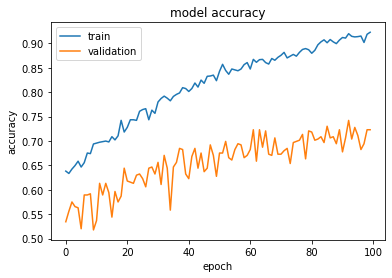

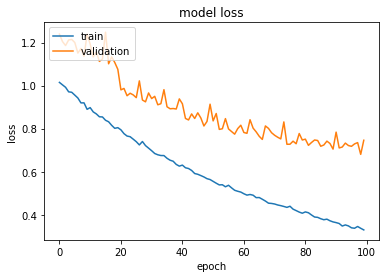

In [65]:
newplot(hist)

In [149]:
ind_eval(hist)

Confusion Matrix
[[ 0  0  0  3  0  0  0  0  0]
 [ 0  4 24  3  2  0  0  0  0]
 [11 10  6  0  2  0  1  0  0]
 [12  2  0  0 14  0  2  0  0]
 [ 0  0  0  0 30  4  0  0  0]
 [ 0  0  0  0 10 19  3  0  0]
 [ 0  0  0  0  0  6 29  0  0]
 [ 0  0  0  0  0  0  1 33  0]
 [ 0  0  0  0  0  0  0  2  0]]
Classification Report
              precision    recall  f1-score   support

        a-90       0.00      0.00      0.00         3
        b-60       0.25      0.12      0.16        33
        c-30       0.20      0.20      0.20        30
        d-15       0.00      0.00      0.00        30
          e0       0.52      0.88      0.65        34
         f15       0.66      0.59      0.62        32
         g30       0.81      0.83      0.82        35
         h60       0.94      0.97      0.96        34
         i90       0.00      0.00      0.00         2

    accuracy                           0.52       233
   macro avg       0.37      0.40      0.38       233
weighted avg       0.49      0.52      0

C:\Users\Akshay\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [161]:


def create_3(model_cnn,opt='sgd'):

    # input
    model_cnn.add(Input(shape=(28, 28, 3)))
    model_cnn.add(Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None))) 

    # Conv Layer 1
    model_cnn.add(Conv2D(32, (3, 3)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

    # Conv Layer 2 
    model_cnn.add(Conv2D(32, (3, 3)))
    model_cnn.add(Activation('relu'))

    # Conv Layer 3
    model_cnn.add(Conv2D(64, (3, 3)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))

    # MLP
    model_cnn.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model_cnn.add(Dense(64))
    model_cnn.add(Activation('relu'))
    model_cnn.add(Dropout(0.2))
    model_cnn.add(Dense(9))
    model_cnn.add(Activation('softmax'))

    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model_cnn.compile(loss='categorical_crossentropy',
                  optimizer=sgd,
                  metrics=[categorical_accuracy])

    if opt=='sgd':
        model_cnn.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["categorical_accuracy"])
    if opt=='adam':
        model_cnn.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["categorical_accuracy"])

    model_cnn.summary()

In [162]:
#create model
model_cnn_3=Sequential()
create_3(model_cnn_3,opt='adam')

monitor=EarlyStopping(monitor='val_loss',min_delta=1e-4,patience=30,verbose=1,restore_best_weights=True)

# Train model on dataset
histd3_2=model_cnn_3.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    callbacks=[monitor],
                    epochs=100,
                    verbose=1)




Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_10 (Lambda)           (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_24 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_25 (Activation)   (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 9, 9, 64)         

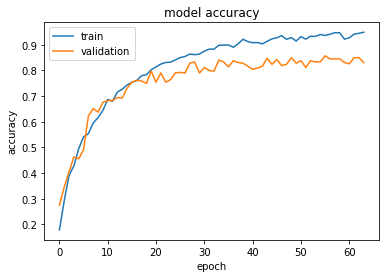

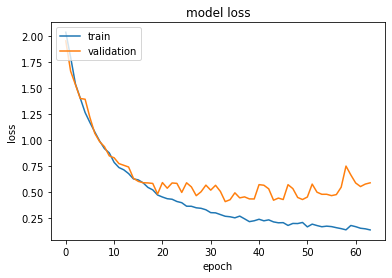

Confusion Matrix
[[ 1  2  0  0  0  0  0  0  0]
 [ 0 29  3  1  0  0  0  0  0]
 [ 0  2 21  4  2  0  1  0  0]
 [ 0  0  4 16  8  0  2  0  0]
 [ 0  0  0  1 31  2  0  0  0]
 [ 0  0  0  0  4 23  5  0  0]
 [ 0  1  0  0  0  2 32  0  0]
 [ 0  0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0  2  0]]
Classification Report
              precision    recall  f1-score   support

        a-90       1.00      0.33      0.50         3
        b-60       0.85      0.88      0.87        33
        c-30       0.75      0.70      0.72        30
        d-15       0.73      0.53      0.62        30
          e0       0.69      0.91      0.78        34
         f15       0.85      0.72      0.78        32
         g30       0.80      0.91      0.85        35
         h60       0.94      1.00      0.97        34
         i90       0.00      0.00      0.00         2

    accuracy                           0.80       233
   macro avg       0.74      0.67      0.68       233
weighted avg       0.80      0.80      0

C:\Users\Akshay\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
newplot(histd3_2)
ind_eval(histd3_2)

In [200]:


def create_4(model_cnn,opt='sgd'):

    # input
    model_cnn.add(Input(shape=(32, 28, 3)))
    model_cnn.add(Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None))) 

    # Conv Layer 1
    model_cnn.add(Conv2D(64, (3, 3)))
    model_cnn.add(Activation('relu'))
    

    # Conv Layer 2 
    model_cnn.add(Conv2D(64, (3, 3),kernel_regularizer=regularizers.l2(0.01)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization(axis=-1))
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
    model_cnn.add(Dropout(0.5))
    # Conv Layer 3
    model_cnn.add(Conv2D(128, (3, 3)))
    model_cnn.add(Activation('relu'))
    # Conv Layer 4
    model_cnn.add(Conv2D(128, (3, 3),kernel_regularizer=regularizers.l2(0.01)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
    model_cnn.add(Dropout(0.5))
    # Conv Layer 5
    model_cnn.add(Conv2D(256, (3, 3)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
    

    # MLP
    model_cnn.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model_cnn.add(Dense(64))
    model_cnn.add(Activation('relu'))
    model_cnn.add(Dropout(0.5))
    model_cnn.add(Dense(9))
    model_cnn.add(Activation('softmax'))

    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model_cnn.compile(loss='categorical_crossentropy',
                  optimizer=sgd,
                  metrics=[categorical_accuracy])

    if opt=='sgd':
        model_cnn.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["categorical_accuracy"])
    if opt=='adam':
        model_cnn.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["categorical_accuracy"])

    model_cnn.summary()

In [201]:
#create model
model_cnn_4=Sequential()
create_4(model_cnn_4,opt='adam')

monitor=EarlyStopping(monitor='val_loss',min_delta=1e-4,patience=30,verbose=1,restore_best_weights=True)

# Train model on dataset
histd3_2=model_cnn_4.fit_generator(generator=train_generator,
                    validation_data=validation_generator,

                    epochs=300,
                    verbose=1,
                    class_weight=class_weight)




Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_22 (Lambda)           (None, 32, 28, 1)         0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 30, 26, 64)        640       
_________________________________________________________________
activation_99 (Activation)   (None, 30, 26, 64)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 28, 24, 64)        36928     
_________________________________________________________________
activation_100 (Activation)  (None, 28, 24, 64)        0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 14, 12, 64)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 14, 12, 64)      

Epoch 79/300
53/53 [==============================] - 1s 27ms/step - loss: 0.7082 - categorical_accuracy: 0.7382 - val_loss: 0.6048 - val_categorical_accuracy: 0.7900
Epoch 80/300
53/53 [==============================] - 1s 24ms/step - loss: 0.7292 - categorical_accuracy: 0.7394 - val_loss: 0.5948 - val_categorical_accuracy: 0.7924
Epoch 81/300
53/53 [==============================] - 1s 24ms/step - loss: 0.7316 - categorical_accuracy: 0.7466 - val_loss: 0.6026 - val_categorical_accuracy: 0.7900
Epoch 82/300
53/53 [==============================] - 1s 24ms/step - loss: 0.7066 - categorical_accuracy: 0.7549 - val_loss: 0.5781 - val_categorical_accuracy: 0.7804
Epoch 83/300
53/53 [==============================] - 1s 24ms/step - loss: 0.7135 - categorical_accuracy: 0.7561 - val_loss: 0.5751 - val_categorical_accuracy: 0.8019
Epoch 84/300
53/53 [==============================] - 1s 24ms/step - loss: 0.7046 - categorical_accuracy: 0.7567 - val_loss: 0.5918 - val_categorical_accuracy: 0.797

53/53 [==============================] - 1s 24ms/step - loss: 0.5027 - categorical_accuracy: 0.8344 - val_loss: 0.4461 - val_categorical_accuracy: 0.8616
Epoch 176/300
53/53 [==============================] - 1s 25ms/step - loss: 0.4924 - categorical_accuracy: 0.8398 - val_loss: 0.4911 - val_categorical_accuracy: 0.8401
Epoch 177/300
53/53 [==============================] - 1s 25ms/step - loss: 0.5275 - categorical_accuracy: 0.8231 - val_loss: 0.4342 - val_categorical_accuracy: 0.8687
Epoch 178/300
53/53 [==============================] - 1s 24ms/step - loss: 0.4808 - categorical_accuracy: 0.8452 - val_loss: 0.4424 - val_categorical_accuracy: 0.8663
Epoch 179/300
53/53 [==============================] - 1s 25ms/step - loss: 0.4939 - categorical_accuracy: 0.8524 - val_loss: 0.4310 - val_categorical_accuracy: 0.8663
Epoch 180/300
53/53 [==============================] - 1s 25ms/step - loss: 0.5159 - categorical_accuracy: 0.8314 - val_loss: 0.4568 - val_categorical_accuracy: 0.8592
Epoch 

53/53 [==============================] - 1s 28ms/step - loss: 0.4080 - categorical_accuracy: 0.8751 - val_loss: 0.4483 - val_categorical_accuracy: 0.8401
Epoch 272/300
53/53 [==============================] - 2s 31ms/step - loss: 0.4044 - categorical_accuracy: 0.8781 - val_loss: 0.4398 - val_categorical_accuracy: 0.8544
Epoch 273/300
53/53 [==============================] - 1s 26ms/step - loss: 0.4144 - categorical_accuracy: 0.8637 - val_loss: 0.4176 - val_categorical_accuracy: 0.8616
Epoch 274/300
53/53 [==============================] - 1s 27ms/step - loss: 0.4107 - categorical_accuracy: 0.8739 - val_loss: 0.3673 - val_categorical_accuracy: 0.8807
Epoch 275/300
53/53 [==============================] - 1s 25ms/step - loss: 0.3960 - categorical_accuracy: 0.8703 - val_loss: 0.3965 - val_categorical_accuracy: 0.8854
Epoch 276/300
53/53 [==============================] - 1s 25ms/step - loss: 0.4093 - categorical_accuracy: 0.8769 - val_loss: 0.3784 - val_categorical_accuracy: 0.8807
Epoch 

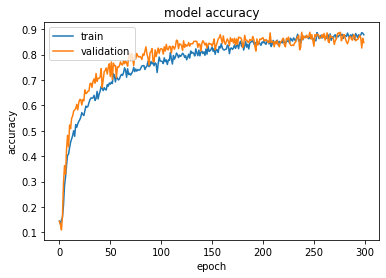

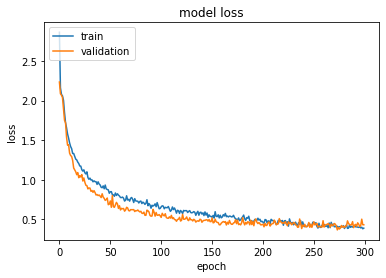

Confusion Matrix
[[ 1  2  0  0  0  0  0  0  0]
 [ 1 28  3  1  0  0  0  0  0]
 [ 0  3 23  3  1  0  0  0  0]
 [ 0  0  3 21  6  0  0  0  0]
 [ 0  0  0  1 32  1  0  0  0]
 [ 0  0  0  0  2 27  3  0  0]
 [ 0  0  0  0  0  1 34  0  0]
 [ 0  0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0  2  0]]
Classification Report
              precision    recall  f1-score   support

        a-90       0.50      0.33      0.40         3
        b-60       0.85      0.85      0.85        33
        c-30       0.79      0.77      0.78        30
        d-15       0.81      0.70      0.75        30
          e0       0.78      0.94      0.85        34
         f15       0.93      0.84      0.89        32
         g30       0.92      0.97      0.94        35
         h60       0.94      1.00      0.97        34
         i90       0.00      0.00      0.00         2

    accuracy                           0.86       233
   macro avg       0.72      0.71      0.71       233
weighted avg       0.85      0.86      0

C:\Users\Akshay\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [202]:
newplot(histd3_2)
ind_eval(histd3_2)

In [195]:


def create_5(model_cnn,opt='sgd'):

    # input
    model_cnn.add(Input(shape=(24, 32, 3)))
    model_cnn.add(Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None))) 

    # Conv Layer 1
    model_cnn.add(Conv2D(64, (3, 3)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
    

    # Conv Layer 2 
    model_cnn.add(Conv2D(64, (3, 3),kernel_regularizer=regularizers.l2(0.01)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
    model_cnn.add(Dropout(0.5))
    # Conv Layer 3
    model_cnn.add(Conv2D(128, (3, 3)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
    # Conv Layer 4
    model_cnn.add(Conv2D(128, (3, 3),kernel_regularizer=regularizers.l2(0.01)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
    model_cnn.add(Dropout(0.5))
    # Conv Layer 5
    model_cnn.add(Conv2D(256, (3, 3)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
    

    # MLP
    model_cnn.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model_cnn.add(Dense(64))
    model_cnn.add(Activation('relu'))
    model_cnn.add(Dropout(0.5))
    model_cnn.add(Dense(9))
    model_cnn.add(Activation('softmax'))

    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
    model_cnn.compile(loss='categorical_crossentropy',
                  optimizer=sgd,
                  metrics=[categorical_accuracy])

    if opt=='sgd':
        model_cnn.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["categorical_accuracy"])
    if opt=='adam':
        model_cnn.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["categorical_accuracy"])

    model_cnn.summary()

In [142]:
#create model
model_cnn_5=Sequential()
create_5(model_cnn_5,opt='adam')

monitor=EarlyStopping(monitor='val_loss',min_delta=1e-4,patience=30,verbose=1,restore_best_weights=True)

# Train model on dataset
histd5=model_cnn_5.fit_generator(generator=train_generator,
                    validation_data=validation_generator,

                    epochs=300,
                    verbose=1,
                    class_weight=class_weight)




ValueError: Negative dimension size caused by subtracting 3 from 1 for 'conv2d_78/Conv2D' (op: 'Conv2D') with input shapes: [?,1,1,128], [3,3,128,256].

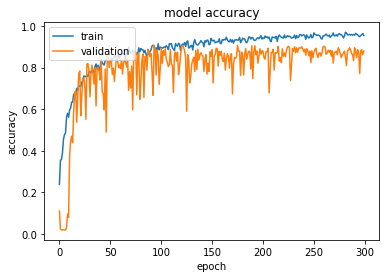

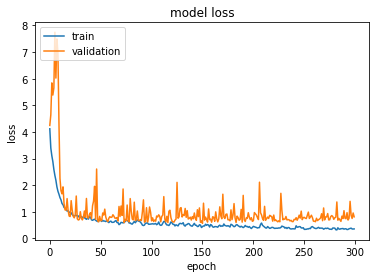

Confusion Matrix
[[ 2  1  0  0  0  0  0  0  0]
 [ 1 29  2  1  0  0  0  0  0]
 [ 0  0 23  7  0  0  0  0  0]
 [ 0  0  0 27  3  0  0  0  0]
 [ 0  0  0  0 32  2  0  0  0]
 [ 0  0  0  0  0 28  4  0  0]
 [ 0  0  0  0  0  1 34  0  0]
 [ 0  0  0  0  0  0  0 34  0]
 [ 0  0  0  0  0  0  0  1  1]]
Classification Report
              precision    recall  f1-score   support

        a-90       0.67      0.67      0.67         3
        b-60       0.97      0.88      0.92        33
        c-30       0.92      0.77      0.84        30
        d-15       0.77      0.90      0.83        30
          e0       0.91      0.94      0.93        34
         f15       0.90      0.88      0.89        32
         g30       0.89      0.97      0.93        35
         h60       0.97      1.00      0.99        34
         i90       1.00      0.50      0.67         2

    accuracy                           0.90       233
   macro avg       0.89      0.83      0.85       233
weighted avg       0.91      0.90      0

In [56]:
newplot(histd5)
ind_eval(histd5)

In [218]:


def create_6(model_cnn,opt='sgd'):

    # input
    model_cnn.add(Input(shape=(32, 32, 3)))
    model_cnn.add(Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None))) 

    # Conv Layer 1
    model_cnn.add(Conv2D(64, (3, 3)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(Dropout(0.2)) 

    # Conv Layer 2 
    model_cnn.add(Conv2D(64, (3, 3),kernel_regularizer=regularizers.l2(0.01)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
    model_cnn.add(Dropout(0.2))
    # Conv Layer 3
    model_cnn.add(Conv2D(128, (3, 3)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(Dropout(0.2))
    # Conv Layer 4
    model_cnn.add(Conv2D(128, (3, 3),kernel_regularizer=regularizers.l2(0.01)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
    model_cnn.add(Dropout(0.2))
    # Conv Layer 5
    
    model_cnn.add(Conv2D(256, (3, 3)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))


    # MLP
    model_cnn.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model_cnn.add(Dense(512))
    model_cnn.add(Activation('relu'))
    model_cnn.add(Dropout(0.5))
    model_cnn.add(Dense(9))
    model_cnn.add(Activation('softmax'))

    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


    if opt=='sgd':
        model_cnn.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["categorical_accuracy"])
    if opt=='adam':
        model_cnn.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["categorical_accuracy"])

    model_cnn.summary()

In [220]:
#create model
model_cnn_6=Sequential()
create_6(model_cnn_6,'adam')

monitor=EarlyStopping(monitor='val_loss',min_delta=1e-5,patience=50,verbose=1,restore_best_weights=True)

# Train model on dataset
histd6=model_cnn_6.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    
                    epochs=150,
                    verbose=1,
                    class_weight=class_weight)




Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_27 (Lambda)           (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 30, 30, 64)        640       
_________________________________________________________________
activation_164 (Activation)  (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_116 (Bat (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_111 (Dropout)        (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 28, 28, 64)        36928     
_________________________________________________________________
activation_165 (Activation)  (None, 28, 28, 64)      

Epoch 25/150
53/53 [==============================] - 2s 36ms/step - loss: 0.4449 - categorical_accuracy: 0.9151 - val_loss: 0.6922 - val_categorical_accuracy: 0.8401
Epoch 26/150
53/53 [==============================] - 2s 36ms/step - loss: 0.4642 - categorical_accuracy: 0.9074 - val_loss: 0.6331 - val_categorical_accuracy: 0.8353
Epoch 27/150
53/53 [==============================] - 2s 35ms/step - loss: 0.4732 - categorical_accuracy: 0.9062 - val_loss: 0.8317 - val_categorical_accuracy: 0.7780
Epoch 28/150
53/53 [==============================] - 1s 28ms/step - loss: 0.4538 - categorical_accuracy: 0.9151 - val_loss: 0.8607 - val_categorical_accuracy: 0.7566
Epoch 29/150
53/53 [==============================] - 2s 30ms/step - loss: 0.4911 - categorical_accuracy: 0.9133 - val_loss: 1.7220 - val_categorical_accuracy: 0.6730
Epoch 30/150
53/53 [==============================] - 1s 28ms/step - loss: 0.5119 - categorical_accuracy: 0.8984 - val_loss: 0.9685 - val_categorical_accuracy: 0.773

Epoch 74/150
53/53 [==============================] - 2s 29ms/step - loss: 0.3143 - categorical_accuracy: 0.9629 - val_loss: 0.6438 - val_categorical_accuracy: 0.8831
Epoch 75/150
53/53 [==============================] - 2s 29ms/step - loss: 0.2876 - categorical_accuracy: 0.9743 - val_loss: 0.8416 - val_categorical_accuracy: 0.8234
Epoch 76/150
53/53 [==============================] - 2s 30ms/step - loss: 0.2950 - categorical_accuracy: 0.9677 - val_loss: 0.8254 - val_categorical_accuracy: 0.8592
Epoch 77/150
53/53 [==============================] - 2s 29ms/step - loss: 0.3300 - categorical_accuracy: 0.9635 - val_loss: 1.3329 - val_categorical_accuracy: 0.7876
Epoch 78/150
53/53 [==============================] - 2s 30ms/step - loss: 0.3328 - categorical_accuracy: 0.9671 - val_loss: 1.3346 - val_categorical_accuracy: 0.7589
Epoch 79/150
53/53 [==============================] - 2s 29ms/step - loss: 0.4228 - categorical_accuracy: 0.9426 - val_loss: 1.7349 - val_categorical_accuracy: 0.706

Epoch 123/150
53/53 [==============================] - 1s 28ms/step - loss: 0.3399 - categorical_accuracy: 0.9677 - val_loss: 2.2504 - val_categorical_accuracy: 0.7064
Epoch 124/150
53/53 [==============================] - 1s 28ms/step - loss: 0.3455 - categorical_accuracy: 0.9665 - val_loss: 0.8714 - val_categorical_accuracy: 0.8640
Epoch 125/150
53/53 [==============================] - 2s 30ms/step - loss: 0.2914 - categorical_accuracy: 0.9785 - val_loss: 0.7328 - val_categorical_accuracy: 0.8974
Epoch 126/150
53/53 [==============================] - 2s 32ms/step - loss: 0.2904 - categorical_accuracy: 0.9725 - val_loss: 1.0660 - val_categorical_accuracy: 0.8115
Epoch 127/150
53/53 [==============================] - 2s 30ms/step - loss: 0.2869 - categorical_accuracy: 0.9749 - val_loss: 0.7530 - val_categorical_accuracy: 0.8783
Epoch 128/150
53/53 [==============================] - 2s 30ms/step - loss: 0.2647 - categorical_accuracy: 0.9797 - val_loss: 0.5920 - val_categorical_accuracy:

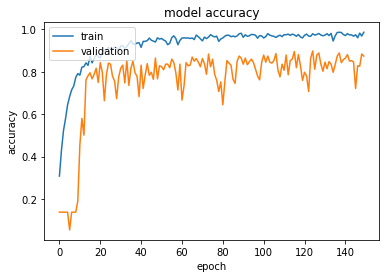

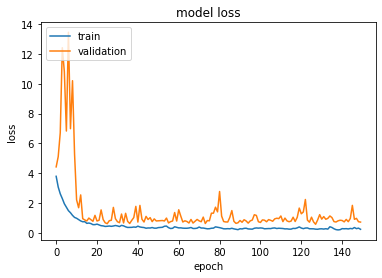

Confusion Matrix
[[ 0  2  0  0  0  0  0  0  0]
 [ 0 25  5  1  1  0  0  0  0]
 [ 0  2 28  3  0  0  0  0  0]
 [ 0  0  3 26  3  1  0  0  0]
 [ 0  0  0  1 29  3  0  0  0]
 [ 0  0  0  0  0 31  2  0  0]
 [ 0  0  0  0  0  3 29  0  0]
 [ 0  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0  0  2]]
Classification Report
              precision    recall  f1-score   support

        a-90       0.00      0.00      0.00         2
        b-60       0.86      0.78      0.82        32
        c-30       0.78      0.85      0.81        33
        d-15       0.84      0.79      0.81        33
          e0       0.88      0.88      0.88        33
         f15       0.82      0.94      0.87        33
         g30       0.94      0.91      0.92        32
         h60       1.00      1.00      1.00        33
         i90       1.00      1.00      1.00         2

    accuracy                           0.87       233
   macro avg       0.79      0.79      0.79       233
weighted avg       0.87      0.87      0

C:\Users\Akshay\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [221]:
newplot(histd6)
ind_eval(histd6)

In [48]:


def create_7(model_cnn,opt='sgd'):

    # input
    model_cnn.add(Input(shape=(32, 32, 3)))
    model_cnn.add(Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None))) 

    # Conv Layer 1
    model_cnn.add(Conv2D(64, (3, 3)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
#   model_cnn.add(Dropout(0.5)) 

    # Conv Layer 2 
    model_cnn.add(Conv2D(64, (3, 3),kernel_regularizer=regularizers.l2(0.01)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
    #model_cnn.add(Dropout(0.5))
    # Conv Layer 3
    model_cnn.add(Conv2D(128, (3, 3)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
    #model_cnn.add(Dropout(0.5))
    # Conv Layer 4
    model_cnn.add(Conv2D(128, (3, 3),kernel_regularizer=regularizers.l2(0.01)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
    #model_cnn.add(Dropout(0.5))
    # Conv Layer 5
    
    model_cnn.add(Conv2D(256, (3, 3)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))


    # MLP
    model_cnn.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model_cnn.add(Dense(512))
    model_cnn.add(Activation('relu'))
    model_cnn.add(Dropout(0.5))
    model_cnn.add(Dense(9))
    model_cnn.add(Activation('softmax'))

    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


    if opt=='sgd':
        model_cnn.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["categorical_accuracy"])
    if opt=='adam':
        model_cnn.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["categorical_accuracy"])

    model_cnn.summary()

In [46]:
#create model
model_cnn_7=Sequential()
create_7(model_cnn_7,'adam')

monitor=EarlyStopping(monitor='val_loss',min_delta=1e-5,patience=50,verbose=1,restore_best_weights=True)

# Train model on datasset
histd7=model_cnn_7.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    
                    epochs=300,
                    verbose=1,
                    class_weight=class_weight)




Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_4 (Lambda)            (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 30, 30, 64)        640       
_________________________________________________________________
activation_28 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
dropout_18 (Dropout)         (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
activation_29 (Activation)   (None, 28, 28, 64)       

53/53 [==============================] - 2s 37ms/step - loss: 1.1274 - categorical_accuracy: 0.6043 - val_loss: 1.8031 - val_categorical_accuracy: 0.4057
Epoch 28/300
53/53 [==============================] - 2s 40ms/step - loss: 1.1399 - categorical_accuracy: 0.6007 - val_loss: 1.4239 - val_categorical_accuracy: 0.5155
Epoch 29/300
53/53 [==============================] - 2s 39ms/step - loss: 1.1857 - categorical_accuracy: 0.5762 - val_loss: 0.9458 - val_categorical_accuracy: 0.7279
Epoch 30/300
53/53 [==============================] - 2s 40ms/step - loss: 1.1533 - categorical_accuracy: 0.6031 - val_loss: 2.1754 - val_categorical_accuracy: 0.3962
Epoch 31/300
53/53 [==============================] - 2s 42ms/step - loss: 1.1709 - categorical_accuracy: 0.5870 - val_loss: 1.1232 - val_categorical_accuracy: 0.6062
Epoch 32/300
53/53 [==============================] - 2s 40ms/step - loss: 1.1179 - categorical_accuracy: 0.6228 - val_loss: 1.3374 - val_categorical_accuracy: 0.5489
Epoch 33/30

53/53 [==============================] - 2s 41ms/step - loss: 0.9371 - categorical_accuracy: 0.7286 - val_loss: 0.8696 - val_categorical_accuracy: 0.7470
Epoch 77/300
53/53 [==============================] - 2s 42ms/step - loss: 0.9432 - categorical_accuracy: 0.7209 - val_loss: 0.8513 - val_categorical_accuracy: 0.7446
Epoch 78/300
53/53 [==============================] - 2s 42ms/step - loss: 0.9042 - categorical_accuracy: 0.7430 - val_loss: 0.8043 - val_categorical_accuracy: 0.7613
Epoch 79/300
53/53 [==============================] - 2s 41ms/step - loss: 0.9127 - categorical_accuracy: 0.7185 - val_loss: 0.8668 - val_categorical_accuracy: 0.7255
Epoch 80/300
53/53 [==============================] - 2s 42ms/step - loss: 0.9084 - categorical_accuracy: 0.7322 - val_loss: 0.8080 - val_categorical_accuracy: 0.7828
Epoch 81/300
53/53 [==============================] - 2s 41ms/step - loss: 0.8612 - categorical_accuracy: 0.7627 - val_loss: 1.0472 - val_categorical_accuracy: 0.6826
Epoch 82/30

Epoch 125/300
53/53 [==============================] - 2s 41ms/step - loss: 0.8225 - categorical_accuracy: 0.7776 - val_loss: 0.7338 - val_categorical_accuracy: 0.8353
Epoch 126/300
53/53 [==============================] - 2s 40ms/step - loss: 0.8050 - categorical_accuracy: 0.7770 - val_loss: 1.2580 - val_categorical_accuracy: 0.5871
Epoch 127/300
53/53 [==============================] - 2s 41ms/step - loss: 0.8422 - categorical_accuracy: 0.7812 - val_loss: 0.7726 - val_categorical_accuracy: 0.8043
Epoch 128/300
53/53 [==============================] - 2s 42ms/step - loss: 0.8396 - categorical_accuracy: 0.7723 - val_loss: 0.7845 - val_categorical_accuracy: 0.7995
Epoch 129/300
53/53 [==============================] - 2s 42ms/step - loss: 0.8168 - categorical_accuracy: 0.7735 - val_loss: 1.0902 - val_categorical_accuracy: 0.6539
Epoch 130/300
53/53 [==============================] - 2s 41ms/step - loss: 0.8075 - categorical_accuracy: 0.7890 - val_loss: 0.6718 - val_categorical_accuracy:

Epoch 174/300
53/53 [==============================] - 2s 42ms/step - loss: 0.7388 - categorical_accuracy: 0.8267 - val_loss: 0.8989 - val_categorical_accuracy: 0.7661
Epoch 175/300
53/53 [==============================] - 2s 42ms/step - loss: 0.7707 - categorical_accuracy: 0.8051 - val_loss: 0.7326 - val_categorical_accuracy: 0.8305
Epoch 176/300
53/53 [==============================] - 2s 43ms/step - loss: 0.7684 - categorical_accuracy: 0.7998 - val_loss: 1.1791 - val_categorical_accuracy: 0.7375
Epoch 177/300
53/53 [==============================] - 2s 42ms/step - loss: 0.7703 - categorical_accuracy: 0.7950 - val_loss: 0.7023 - val_categorical_accuracy: 0.8496
Epoch 178/300
53/53 [==============================] - 2s 41ms/step - loss: 0.7621 - categorical_accuracy: 0.8045 - val_loss: 1.1923 - val_categorical_accuracy: 0.6444
Epoch 179/300
53/53 [==============================] - 2s 45ms/step - loss: 0.7820 - categorical_accuracy: 0.8171 - val_loss: 0.7711 - val_categorical_accuracy:

Epoch 223/300
53/53 [==============================] - 2s 42ms/step - loss: 0.7073 - categorical_accuracy: 0.8344 - val_loss: 0.6423 - val_categorical_accuracy: 0.8616
Epoch 224/300
53/53 [==============================] - 2s 43ms/step - loss: 0.6595 - categorical_accuracy: 0.8553 - val_loss: 0.9245 - val_categorical_accuracy: 0.7733
Epoch 225/300
53/53 [==============================] - 2s 43ms/step - loss: 0.6954 - categorical_accuracy: 0.8404 - val_loss: 0.9705 - val_categorical_accuracy: 0.7518
Epoch 226/300
53/53 [==============================] - 2s 43ms/step - loss: 0.7641 - categorical_accuracy: 0.8165 - val_loss: 0.8091 - val_categorical_accuracy: 0.8019
Epoch 227/300
53/53 [==============================] - 2s 42ms/step - loss: 0.7559 - categorical_accuracy: 0.8081 - val_loss: 0.7488 - val_categorical_accuracy: 0.8401
Epoch 228/300
53/53 [==============================] - 2s 42ms/step - loss: 0.7066 - categorical_accuracy: 0.8494 - val_loss: 0.7787 - val_categorical_accuracy:

Epoch 272/300
53/53 [==============================] - 3s 56ms/step - loss: 0.6935 - categorical_accuracy: 0.8422 - val_loss: 0.9351 - val_categorical_accuracy: 0.7709
Epoch 273/300
53/53 [==============================] - 3s 49ms/step - loss: 0.6798 - categorical_accuracy: 0.8458 - val_loss: 0.8104 - val_categorical_accuracy: 0.8234
Epoch 274/300
53/53 [==============================] - 3s 54ms/step - loss: 0.6710 - categorical_accuracy: 0.8542 - val_loss: 0.8421 - val_categorical_accuracy: 0.8162
Epoch 275/300
53/53 [==============================] - 3s 55ms/step - loss: 0.6626 - categorical_accuracy: 0.8500 - val_loss: 0.7503 - val_categorical_accuracy: 0.8568
Epoch 276/300
53/53 [==============================] - 3s 49ms/step - loss: 0.6666 - categorical_accuracy: 0.8470 - val_loss: 1.1676 - val_categorical_accuracy: 0.7613
Epoch 277/300
53/53 [==============================] - 2s 44ms/step - loss: 0.6697 - categorical_accuracy: 0.8506 - val_loss: 0.8822 - val_categorical_accuracy:

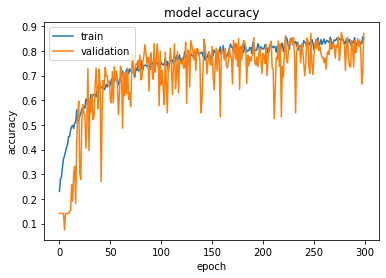

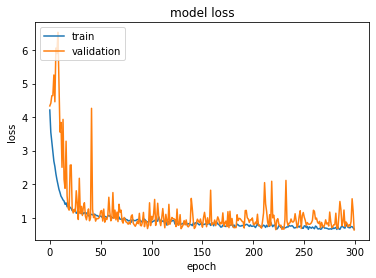

Confusion Matrix
[[ 1  1  0  0  0  0  0  0  0]
 [ 2 30  0  0  0  0  0  0  0]
 [ 0  1 27  5  0  0  0  0  0]
 [ 0  0  5 25  3  0  0  0  0]
 [ 0  0  0  2 31  0  0  0  0]
 [ 0  0  0  0  1 31  1  0  0]
 [ 0  0  0  0  0  4 28  0  0]
 [ 0  0  0  0  0  0  0 33  0]
 [ 0  0  0  0  0  0  0  1  1]]
Classification Report
              precision    recall  f1-score   support

        a-90       0.33      0.50      0.40         2
        b-60       0.94      0.94      0.94        32
        c-30       0.84      0.82      0.83        33
        d-15       0.78      0.76      0.77        33
          e0       0.89      0.94      0.91        33
         f15       0.89      0.94      0.91        33
         g30       0.97      0.88      0.92        32
         h60       0.97      1.00      0.99        33
         i90       1.00      0.50      0.67         2

    accuracy                           0.89       233
   macro avg       0.84      0.81      0.81       233
weighted avg       0.89      0.89      0

In [47]:
newplot(histd7)
ind_eval(histd7)

In [59]:


def create_8(model_cnn,opt='sgd'):

    # input
    model_cnn.add(Input(shape=(32, 32, 3)))
    model_cnn.add(Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None))) 

    # Conv Layer 1
    model_cnn.add(Conv2D(64, (3, 3)))
    model_cnn.add(Activation('relu'))
#    model_cnn.add(BatchNormalization())
#   model_cnn.add(Dropout(0.5)) 

    # Conv Layer 2 
    model_cnn.add(Conv2D(64, (3, 3),kernel_regularizer=regularizers.l2(0.01)))
    model_cnn.add(Activation('relu'))
#   model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
    #model_cnn.add(Dropout(0.5))
    # Conv Layer 3
    model_cnn.add(Conv2D(128, (3, 3)))
    model_cnn.add(Activation('relu'))
#    model_cnn.add(BatchNormalization())
    #model_cnn.add(Dropout(0.5))
    # Conv Layer 4
    model_cnn.add(Conv2D(128, (3, 3),kernel_regularizer=regularizers.l2(0.01)))
    model_cnn.add(Activation('relu'))
#    model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
    #model_cnn.add(Dropout(0.5))
    # Conv Layer 5
    
    model_cnn.add(Conv2D(256, (3, 3)))
    model_cnn.add(Activation('relu'))
#    model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))


    # MLP
    model_cnn.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model_cnn.add(Dense(512))
    model_cnn.add(Activation('relu'))
    model_cnn.add(Dropout(0.5))
    model_cnn.add(Dense(9))
    model_cnn.add(Activation('softmax'))

    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


    if opt=='sgd':
        model_cnn.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["categorical_accuracy"])
    if opt=='adam':
        model_cnn.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["categorical_accuracy"])

    model_cnn.summary()

In [60]:
#create model
model_cnn_8=Sequential()
create_8(model_cnn_8,'adam')

monitor=EarlyStopping(monitor='val_loss',min_delta=1e-5,patience=50,verbose=1,restore_best_weights=True)

# Train model on datasset
histd8=model_cnn_8.fit_generator(generator=train_generator,
                    validation_data=validation_generator,
                    
                    epochs=250,
                    verbose=1,
                    class_weight=class_weight)




Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_9 (Lambda)            (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 30, 30, 64)        640       
_________________________________________________________________
activation_63 (Activation)   (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 28, 28, 64)        36928     
_________________________________________________________________
activation_64 (Activation)   (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 12, 12, 128)      

53/53 [==============================] - 2s 43ms/step - loss: 2.0255 - categorical_accuracy: 0.1417 - val_loss: 2.0252 - val_categorical_accuracy: 0.1384
Epoch 33/250
53/53 [==============================] - 2s 43ms/step - loss: 2.0238 - categorical_accuracy: 0.1405 - val_loss: 2.0268 - val_categorical_accuracy: 0.1408
Epoch 34/250
53/53 [==============================] - 2s 42ms/step - loss: 2.0252 - categorical_accuracy: 0.1572 - val_loss: 2.0241 - val_categorical_accuracy: 0.1408
Epoch 35/250
53/53 [==============================] - 2s 43ms/step - loss: 2.0297 - categorical_accuracy: 0.1315 - val_loss: 2.0258 - val_categorical_accuracy: 0.1408
Epoch 36/250
53/53 [==============================] - 2s 42ms/step - loss: 2.0262 - categorical_accuracy: 0.1375 - val_loss: 2.0247 - val_categorical_accuracy: 0.1408
Epoch 37/250
53/53 [==============================] - 2s 43ms/step - loss: 2.0260 - categorical_accuracy: 0.1500 - val_loss: 2.0279 - val_categorical_accuracy: 0.1384
Epoch 38/25

53/53 [==============================] - 2s 42ms/step - loss: 2.0295 - categorical_accuracy: 0.1357 - val_loss: 2.0255 - val_categorical_accuracy: 0.1384
Epoch 82/250
53/53 [==============================] - 2s 42ms/step - loss: 2.0228 - categorical_accuracy: 0.1536 - val_loss: 2.0254 - val_categorical_accuracy: 0.1384
Epoch 83/250
53/53 [==============================] - 2s 45ms/step - loss: 2.0236 - categorical_accuracy: 0.1387 - val_loss: 2.0253 - val_categorical_accuracy: 0.1384
Epoch 84/250
53/53 [==============================] - 2s 40ms/step - loss: 2.0242 - categorical_accuracy: 0.1411 - val_loss: 2.0248 - val_categorical_accuracy: 0.1408
Epoch 85/250
53/53 [==============================] - 2s 45ms/step - loss: 2.0239 - categorical_accuracy: 0.1333 - val_loss: 2.0252 - val_categorical_accuracy: 0.1384
Epoch 86/250
53/53 [==============================] - 2s 41ms/step - loss: 2.0234 - categorical_accuracy: 0.1345 - val_loss: 2.0248 - val_categorical_accuracy: 0.1384
Epoch 87/25

Epoch 130/250
53/53 [==============================] - 2s 47ms/step - loss: 2.0251 - categorical_accuracy: 0.1423 - val_loss: 2.0250 - val_categorical_accuracy: 0.1384
Epoch 131/250
53/53 [==============================] - 2s 44ms/step - loss: 2.0255 - categorical_accuracy: 0.1435 - val_loss: 2.0247 - val_categorical_accuracy: 0.1408
Epoch 132/250
53/53 [==============================] - 2s 44ms/step - loss: 2.0262 - categorical_accuracy: 0.1291 - val_loss: 2.0253 - val_categorical_accuracy: 0.1408
Epoch 133/250
53/53 [==============================] - 2s 46ms/step - loss: 2.0243 - categorical_accuracy: 0.1309 - val_loss: 2.0247 - val_categorical_accuracy: 0.1408
Epoch 134/250
53/53 [==============================] - 3s 47ms/step - loss: 2.0233 - categorical_accuracy: 0.1393 - val_loss: 2.0249 - val_categorical_accuracy: 0.1408
Epoch 135/250
53/53 [==============================] - 2s 42ms/step - loss: 2.0228 - categorical_accuracy: 0.1339 - val_loss: 2.0231 - val_categorical_accuracy:

Epoch 179/250
53/53 [==============================] - 2s 43ms/step - loss: 2.0245 - categorical_accuracy: 0.1321 - val_loss: 2.0258 - val_categorical_accuracy: 0.1408
Epoch 180/250
53/53 [==============================] - 2s 42ms/step - loss: 2.0245 - categorical_accuracy: 0.1261 - val_loss: 2.0254 - val_categorical_accuracy: 0.1384
Epoch 181/250
53/53 [==============================] - 2s 42ms/step - loss: 2.0228 - categorical_accuracy: 0.1345 - val_loss: 2.0255 - val_categorical_accuracy: 0.1384
Epoch 182/250
53/53 [==============================] - 2s 42ms/step - loss: 2.0264 - categorical_accuracy: 0.1506 - val_loss: 2.0252 - val_categorical_accuracy: 0.1408
Epoch 183/250
53/53 [==============================] - 2s 43ms/step - loss: 2.0246 - categorical_accuracy: 0.1345 - val_loss: 2.0254 - val_categorical_accuracy: 0.1408
Epoch 184/250
53/53 [==============================] - 2s 39ms/step - loss: 2.0232 - categorical_accuracy: 0.1411 - val_loss: 2.0246 - val_categorical_accuracy:

Epoch 228/250
53/53 [==============================] - 2s 45ms/step - loss: 2.0233 - categorical_accuracy: 0.1339 - val_loss: 2.0250 - val_categorical_accuracy: 0.1384
Epoch 229/250
53/53 [==============================] - 2s 45ms/step - loss: 2.0238 - categorical_accuracy: 0.1357 - val_loss: 2.0257 - val_categorical_accuracy: 0.1384
Epoch 230/250
53/53 [==============================] - 2s 41ms/step - loss: 2.0287 - categorical_accuracy: 0.1291 - val_loss: 2.0246 - val_categorical_accuracy: 0.1408
Epoch 231/250
53/53 [==============================] - 2s 42ms/step - loss: 2.0233 - categorical_accuracy: 0.1524 - val_loss: 2.0251 - val_categorical_accuracy: 0.1384
Epoch 232/250
53/53 [==============================] - 2s 43ms/step - loss: 2.0237 - categorical_accuracy: 0.1482 - val_loss: 2.0255 - val_categorical_accuracy: 0.1384
Epoch 233/250
53/53 [==============================] - 2s 42ms/step - loss: 2.0245 - categorical_accuracy: 0.1423 - val_loss: 2.0253 - val_categorical_accuracy:

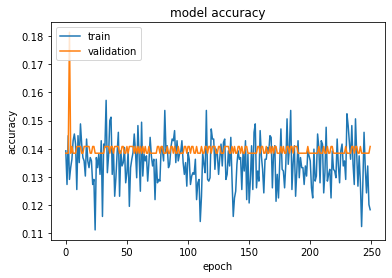

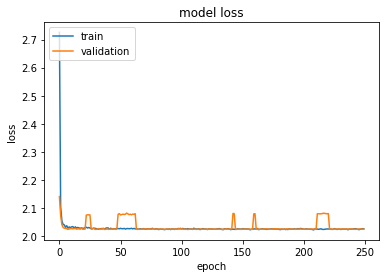

Confusion Matrix
[[ 0  2  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0]
 [ 0 33  0  0  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0]]
Classification Report
              precision    recall  f1-score   support

        a-90       0.00      0.00      0.00         2
        b-60       0.14      1.00      0.24        32
        c-30       0.00      0.00      0.00        33
        d-15       0.00      0.00      0.00        33
          e0       0.00      0.00      0.00        33
         f15       0.00      0.00      0.00        33
         g30       0.00      0.00      0.00        32
         h60       0.00      0.00      0.00        33
         i90       0.00      0.00      0.00         2

    accuracy                           0.14       233
   macro avg       0.02      0.11      0.03       233
weighted avg       0.02      0.14      0

C:\Users\Akshay\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [61]:
newplot(histd8)
ind_eval(histd8)

In [ ]:


def create_6(opt,input_size,filter_pixel,drop_out,finalAct,lastDense):

    # input
    model_cnn=Sequential()
    model_cnn.add(Input(shape=(input_size, input_size, 3)))
    model_cnn.add(Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None))) 

    # Conv Layer 1
    model_cnn.add(Conv2D(64, (filter_pixel, filter_pixel)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(Dropout(drop_out)) 

    # Conv Layer 2 
    model_cnn.add(Conv2D(64, (filter_pixel, filter_pixel),kernel_regularizer=regularizers.l2(0.01)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
    model_cnn.add(Dropout(drop_out))
    # Conv Layer 3
    model_cnn.add(Conv2D(128, (filter_pixel, filter_pixel)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(Dropout(drop_out))
    # Conv Layer 4
    model_cnn.add(Conv2D(128, (filter_pixel, filter_pixel),kernel_regularizer=regularizers.l2(0.01)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))
    model_cnn.add(Dropout(drop_out))
    # Conv Layer 5
    
    model_cnn.add(Conv2D(256, (filter_pixel, filter_pixel)))
    model_cnn.add(Activation('relu'))
    model_cnn.add(BatchNormalization())
    model_cnn.add(MaxPooling2D(pool_size=(2, 2)))


    # MLP
    model_cnn.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model_cnn.add(Dense(lastDense))
    model_cnn.add(Activation('relu'))
    model_cnn.add(Dropout(drop_out))
    model_cnn.add(Dense(9))
    model_cnn.add(Activation(finalAct))

    sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)


    if opt=='sgd':
        model_cnn.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["categorical_accuracy"])
    if opt=='adam':
        model_cnn.compile(optimizer=opt,loss="categorical_crossentropy", metrics=["categorical_accuracy"])
    return model_cnn


In [1]:
pip install keras-tuner

  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-py3-none-any.whl size=73206 sha256=346c6ee66c7e7be8d51524d45ae02b6d3829ab1081e6712bbd216bcb05b3ace2
  Stored in directory: c:\users\akshay\appdata\local\pip\cache\wheels\0b\cf\2f\1a1749d3a3650fac3305a8d7f9237b6de7c41068e2f8520ca2
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15357 sha256=c59d7dc3ee9e64c242e9c31048a990519f0e3f704ec034441fc12ba569403f23
  Stored in directory: c:\users\akshay\appdata\local\pip\cache\wheels\ba\ad\c8\2d98360791161cd3db6daf6b5e730f34021fc9367d5879f497
Successfully built keras-tuner terminaltables
Note: you may need to restart the kernel to use updated packages.
